# <span style='color:navy;'> Multi-Class Prediction of Obesity Risk </span>

#### <h1>Index</h1>

<a id="toc"></a>

- [<span style='color:black; font-size: 1.3em; font-family: "Comic Sans MS"'>1.1</span> <span style='color:purple; font-size: 1.3em; font-family: "Lucida Console", cursive;'>Import Libraries</span>](#1.1)
- [<span style='color:black; font-size: 1.3em; font-family: "Comic Sans MS"'>1.2</span> <span style='color:purple; font-size: 1.3em; font-family: "Lucida Console", cursive;'>Import Data</span>](#1.2)
- [<span style='color:black; font-size: 1.3em; font-family: "Comic Sans MS"'>1.3</span> <span style='color:purple; font-size: 1.3em; font-family: "Lucida Console", Courier, monospace;'>Summary of the data</span>](#1.3)
- [<span style='color:black; font-size: 1.3em; font-family: "Comic Sans MS"'>2.</span> <span style='color:purple; font-size: 1.3em; font-family: "Lucida Console", sans-serif;'>Exploratory Data Analysis</span>](#2)
- [<span style='color:black; font-size: 1.3em; font-family: "Comic Sans MS"'>3.</span> <span style='color:purple; font-size: 1.3em; font-family: "Lucida Console", Monaco, monospace;'>Feature Engineering and Data Pre-Processing</span>](#3)
- [<span style='color:black; font-size: 1.3em; font-family: "Comic Sans MS"'>4.</span> <span style='color:purple; font-size: 1.3em; font-family: "Lucida Console", Gadget, sans-serif;'>Model Prediction</span>](#4)
- [<span style='color:black; font-size: 1.3em; font-family: "Comic Sans MS"'>5.</span> <span style='color:purple; font-size: 1.3em; font-family: "Lucida Console", Geneva, sans-serif;'>Prediction on Test data</span>](#5)


In [1]:
!pip install dmba optuna

<a id="1.1"></a>
## <b>1.1 <span style='color:purple; border: 1px solid #000000;'>Import Libraries</span></b> 

In [2]:
import pandas as pd
import numpy as np
from scipy import stats # statistical functions and distributions
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error
import matplotlib.pylab as plt
import plotly.express as px
import seaborn as sns
import warnings
!pip install dmba
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from dmba.metric import AIC_score
from sklearn.pipeline import Pipeline, make_pipeline # creating data processing pipelines
from sklearn.impute import SimpleImputer # imputing missing values in datasets
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import optuna
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
warnings.filterwarnings("ignore")
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.svm import SVC
import matplotlib.pyplot as plt

<a id="1.2"></a>
## <b>1.2 <span style='color:purple; border: 1px solid #000000;'> Import Data </span></b> 

In [3]:
#Reading the training / testing files
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


<a id="1.3"></a>
## <b>1.3 <span style='color:purple; border: 1px solid #000000;'> Summary of the Data </span></b> 

In [4]:
#Visualizing descriptive statistics numerical features
train_data.describe().style.background_gradient()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.500000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.462780,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.250000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.500000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.750000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.000000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
num_row= train_data.shape[0]
num_col= train_data.shape[1]
print("Total number of rows is {}".format(num_row))
print("Total number of columns is {}".format(num_col))

Total number of rows is 20758
Total number of columns is 18


In [6]:
train_data.isnull().sum() #checking null values

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<a id="2"></a>
## <b>2. <span style='color:purple; border: 1px solid #000000;'> Exploratory Data Analysis </span></b> 

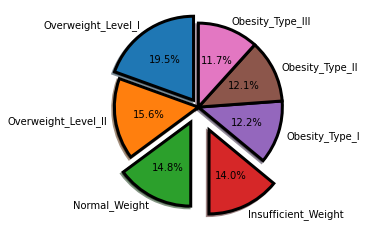

In [7]:
#Analyze, Model, and Visualize#

obesity = 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight','Insufficient_Weight','Obesity_Type_I','Obesity_Type_II', 'Obesity_Type_III',

pie_chart = train_data['NObeyesdad'].value_counts()

explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0, 0.0)

plt.pie(pie_chart, explode = explode, 
        labels = obesity, autopct = '%1.1f%%', 
        shadow = True, startangle = 90, 
        wedgeprops= {"edgecolor":"black", 
                     'linewidth': 3, 
                     'antialiased': True}) 
plt.axis('equal')

plt.show()

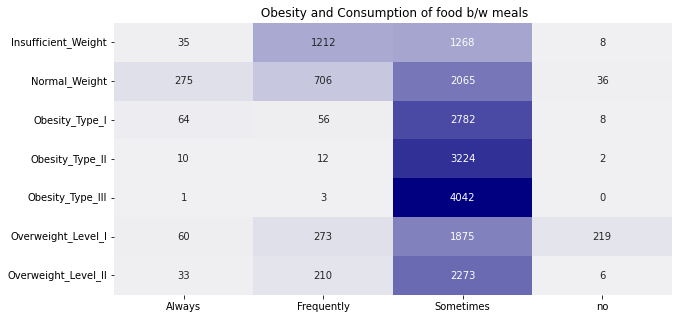

In [8]:
cross_tab = pd.crosstab(train_data['NObeyesdad'], train_data['CAEC'])
plt.figure(figsize=(10, 5))
light_palette = sns.light_palette("navy", as_cmap=True)
sns.heatmap(cross_tab, annot=True, cmap=light_palette, fmt='d', cbar=False)
plt.title(' Obesity and Consumption of food b/w meals')
plt.xlabel('')
plt.ylabel('')
plt.show()

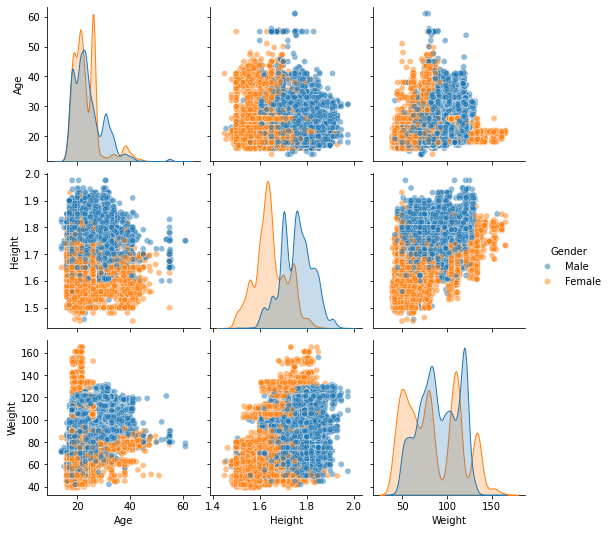

In [9]:
sns.pairplot(train_data[['Age', 'Height', 'Weight', 'Gender']], hue='Gender', plot_kws={'alpha': 0.5})
plt.show()

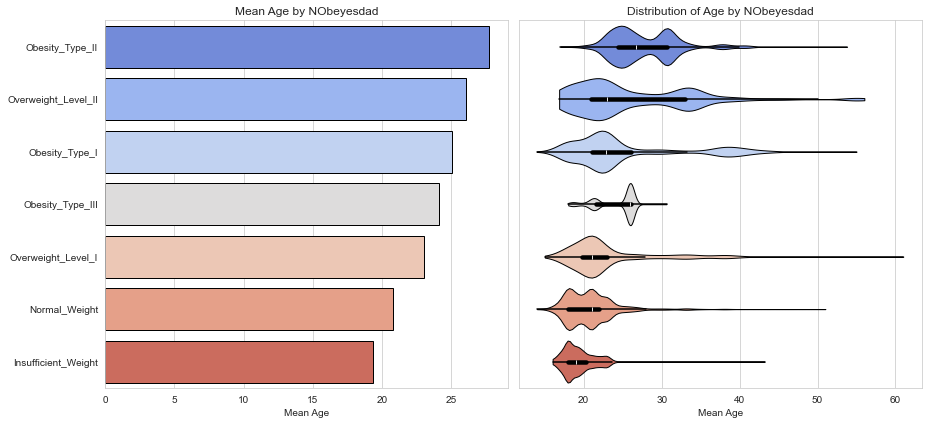

In [10]:
mean_age = train_data.groupby('NObeyesdad')['Age'].mean().sort_values(ascending=False).reset_index()

# Define the color palette and style
palette = sns.color_palette("coolwarm", len(mean_age))
sns.set_style("whitegrid")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(13,6), sharey=True)

# Plot the mean age as a horizontal bar chart on the first subplot
sns.barplot(x='Age', y='NObeyesdad', data=mean_age,
            palette=palette, edgecolor='black', ax=axes[0])
axes[0].set_title('Mean Age by NObeyesdad')
axes[0].set_xlabel('Mean Age')
axes[0].set_ylabel('')

# Plot the distribution of age by NObeyesdad as violin plots on the second subplot
sns.violinplot(x='Age', y='NObeyesdad', data=train_data,
               order=mean_age['NObeyesdad'], palette=palette, cut=0, linewidth=1, edgecolor='black', ax=axes[1])
axes[1].set_title('Distribution of Age by NObeyesdad')
axes[1].set_xlabel('Mean Age')
axes[1].set_ylabel('')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

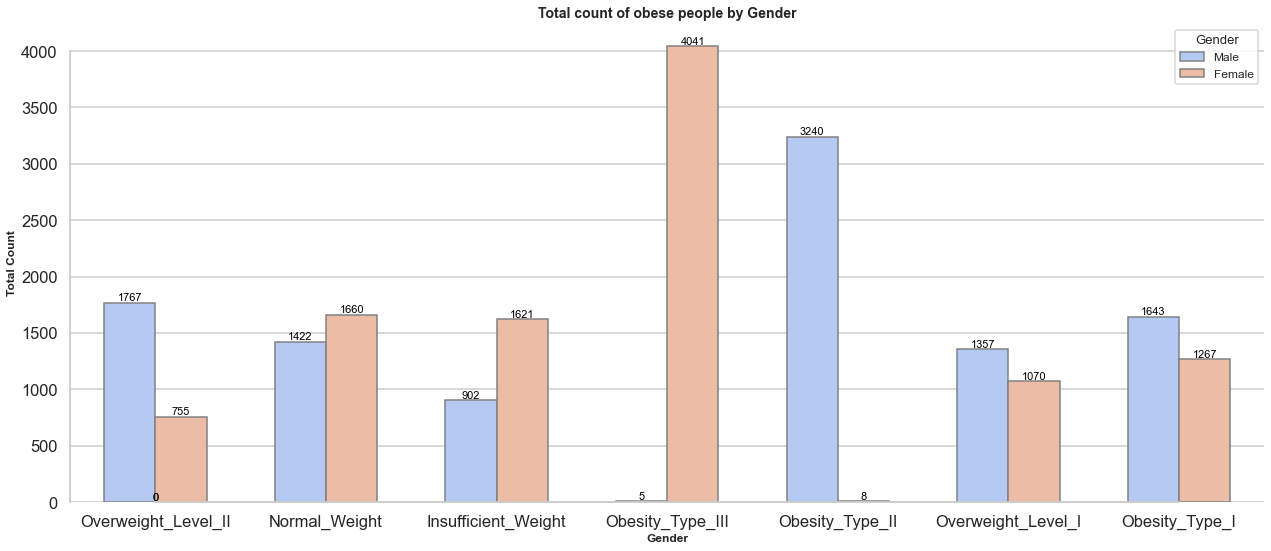

In [11]:
sns.set(style="whitegrid", context="talk")

# Create the figure and axis objects
plt.figure(figsize=(18,8))
ax = sns.countplot(x="NObeyesdad", hue="Gender", data=train_data, width=0.6, palette="coolwarm", edgecolor='grey')

# Customizing the aesthetics of the plot
ax.set_xlabel('Gender', fontsize=12, weight='bold')
ax.set_ylabel('Total Count', fontsize=12, weight='bold')
ax.set_title('Total count of obese people by Gender', fontsize=14, weight='bold')

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Gender", title_fontsize='13', loc='upper right', fontsize='12')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Remove the top and right spines from plot
sns.despine(trim=True)

# Show the plot
plt.tight_layout()
plt.show()

<a id="3"></a>
## <b>3. <span style='color:purple; border: 1px solid #000000;'> Feature Engineering and Data Pre-Processing </span></b> 

In [12]:
X = train_data.drop(columns='NObeyesdad')
y = train_data['NObeyesdad']

# Feature engineering - Adding BMI as a feature as per the calculations below 
### Underweight = <18.5
### Normal weight = 18.5–24.9
### Overweight = 25–29.9
### Obesity = BMI of 30 or greater

In [13]:
class BMICalculator(BaseEstimator, TransformerMixin):
    def __init__(self, height_column, weight_column):
        self.height_column = height_column
        self.weight_column = weight_column

    def fit(self, X, y=None):
        return self  

    def transform(self, X):
        # Assuming height is in meters and weight in kg, and X is a DataFrame
        X = X.copy()
        height = X[self.height_column]
        weight = X[self.weight_column]
        bmi = weight / np.square(height)
        X['BMI'] = bmi
        X.drop(columns=[self.height_column, self.weight_column], inplace=True)
        return X

In [14]:
all_numerical_cols = ["Height", "Weight","Age","FCVC","NCP","CH2O","FAF","TUE"]
height_column = 'Height' 
weight_column = 'Weight'
# Remove height and weight from numerical columns as they will be handled separately
# numerical_columns = [col for col in all_numerical_cols if col not in {height_column, weight_column}]
categorical_cols = ['Gender','family_history_with_overweight', 'FAVC', 'CAEC','SMOKE', 'SCC', 'CALC',"MTRANS"]

In [15]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', all_numerical_cols),
        ('bmi', BMICalculator(height_column=height_column, weight_column=weight_column), [height_column, weight_column]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [16]:
# Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [17]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    output_features = []

    for name, transformer, columns in column_transformer.transformers_:
        if name == 'bmi':  # Custom BMI transformer adds a single feature
            output_features.append('BMI')
        elif hasattr(transformer, 'get_feature_names_out'):
            output_features.extend(transformer.get_feature_names_out(columns))
        else:
            output_features.extend(columns)  # Case for 'passthrough'
    
    return output_features
pipeline.fit(X)
transformed_feature_names = get_feature_names(preprocessor)

In [18]:
X_transformed = pd.DataFrame(pipeline.transform(X))
X_transformed.columns = transformed_feature_names[:-1]
X_transformed['NObeyesdad'] = y

In [19]:
#X_transformed.apply(preprocessing.LabelEncoder().fit_transform(X_transformed['NObeyesdad']))
label_encoding = LabelEncoder()
encoded = label_encoding.fit_transform(X_transformed['NObeyesdad'])

In [20]:
le_name_mapping = dict(zip(label_encoding.classes_, label_encoding.transform(label_encoding.classes_)))
target_names = list(le_name_mapping.keys())

In [21]:
X_transformed_no_categorical = X_transformed.drop(columns=['NObeyesdad'])
encoded_data = pd.DataFrame(encoded, columns=['NObeyesdad'])

#### Train-test split ###

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_no_categorical, 
                                                    encoded_data,test_size=0.2, random_state=42)

<a id="4"></a>
## <b>4. <span style='color:purple; border: 1px solid #000000;'>Model Prediction</span></b> 

**Tuning LGBM model with optuna**

In [31]:
def objective(trial, X_train, y_train, X_test, y_test):
    # Define hyperparameters to tune
    params = {
    "objective": "multiclass",          
    "metric": "multi_logloss",          
    "verbosity": -1,                    
    "boosting_type": "gbdt",            
    "random_state": 42,       
    "num_class": 7,                     
    'learning_rate': 0.01197852738297134,  
    'n_estimators': 509,                
    'lambda_l1': 0.009715116714365275,  
    'lambda_l2': 0.03853395161282091,   
    'max_depth': 11,                    
    'colsample_bytree': 0.7364306508830604,  
    'subsample': 0.9529973839959326,    
    'min_child_samples': 17           
    
    }
      
    # Initializing LGBM classifier
    lgbm = lgb.LGBMClassifier(**params)
    
    # Training the model
    lgbm.fit(X_train, y_train)
    
    # Making the predictions
    predictions = lgbm.predict(X_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the negative accuracy since Optuna minimizes the objective
    return -accuracy

def tune_lgbm_with_optuna(X_train, y_train, X_test, y_test, n_trials=50):
    
    # Creating study object and optimize the objective function
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=n_trials)
    
    # Getting the best hyperparameters
    best_params = study.best_params
    
    # Initializing the LGBM model with the best hyperparameters
    best_lgbm_model = lgb.LGBMClassifier(**best_params)
    
    # Train the best LGBM model
    best_lgbm_model.fit(X_train, y_train)
    
    # Make predictions using the best model
    best_predictions = best_lgbm_model.predict(X_test)
    
    # Calculate accuracy using the best model
    best_accuracy = accuracy_score(y_test, best_predictions)
    
    # Return the best LGBM model and its accuracy
    return best_lgbm_model, best_accuracy, best_predictions, best_params

In [32]:
best_lgbm_model, best_accuracy, best_predictions, best_params = tune_lgbm_with_optuna(X_train, y_train, X_test, y_test)
print("Best parameters found:", best_params)
print("Best accuracy:", best_accuracy)

[I 2024-03-05 19:58:44,220] A new study created in memory with name: no-name-5e01c9bc-b436-485e-a520-f689c7ddad54
[I 2024-03-05 19:58:48,354] Trial 0 finished with value: -0.9140173410404624 and parameters: {}. Best is trial 0 with value: -0.9140173410404624.
[I 2024-03-05 19:58:52,339] Trial 1 finished with value: -0.9140173410404624 and parameters: {}. Best is trial 0 with value: -0.9140173410404624.
[I 2024-03-05 19:58:57,549] Trial 2 finished with value: -0.9140173410404624 and parameters: {}. Best is trial 0 with value: -0.9140173410404624.
[I 2024-03-05 19:59:03,552] Trial 3 finished with value: -0.9140173410404624 and parameters: {}. Best is trial 0 with value: -0.9140173410404624.
[I 2024-03-05 19:59:11,046] Trial 4 finished with value: -0.9140173410404624 and parameters: {}. Best is trial 0 with value: -0.9140173410404624.
[I 2024-03-05 19:59:18,035] Trial 5 finished with value: -0.9140173410404624 and parameters: {}. Best is trial 0 with value: -0.9140173410404624.
[I 2024-03

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 31
[LightGBM] [Info] Start training from score -2.104688
[LightGBM] [Info] Start training from score -1.901909
[LightGBM] [Info] Start training from score -1.960468
[LightGBM] [Info] Start training from score -1.872103
[LightGBM] [Info] Start training from score -1.640693
[LightGBM] [Info] Start training from score -2.138351
[LightGBM] [Info] Start training from score -2.099268
Best parameters found: {}
Best accuracy: 0.911849710982659


In [33]:
def create_model(model_type, X_train, X_test, y_train, y_test):
    
    if model_type == 'rf':
        model = RandomForestClassifier()
    elif model_type == 'lgbm':
        model = lgb.LGBMClassifier()
    else:
        return ValueError("Invalid model type. Supported types are 'rf', and 'lgbm'.")
        
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(classification_report(y_test, predictions, target_names=target_names))
    print(f"Accuracy: {accuracy*100:.2f}%")
    
    global_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    global_importances.sort_values(ascending=True, inplace=True)
    
     # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(25, 15))

    # Plot for Feature Importance
    
    axes[0].barh(global_importances.index, global_importances.values, color=sns.color_palette("BuGn"))
    axes[0].set_xlabel("Importance")
    axes[0].set_ylabel("Feature")
    axes[0].set_title("Global Feature Importance - Built-in Method")
    
    # Plot for Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(values_format='d', cmap='Blues', ax=axes[1], xticks_rotation=90)
    axes[1].set_title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

    return model, accuracy, predictions

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.95      0.93       499
      Normal_Weight       0.88      0.88      0.88       603
     Obesity_Type_I       0.90      0.87      0.89       572
    Obesity_Type_II       0.97      0.97      0.97       694
   Obesity_Type_III       1.00      1.00      1.00       827
 Overweight_Level_I       0.81      0.78      0.80       470
Overweight_Level_II       0.79      0.82      0.80       487

           accuracy                           0.91      4152
          macro avg       0.90      0.90      0.90      4152
       weighted avg       0.91      0.91      0.91      4152

Accuracy: 90.73%


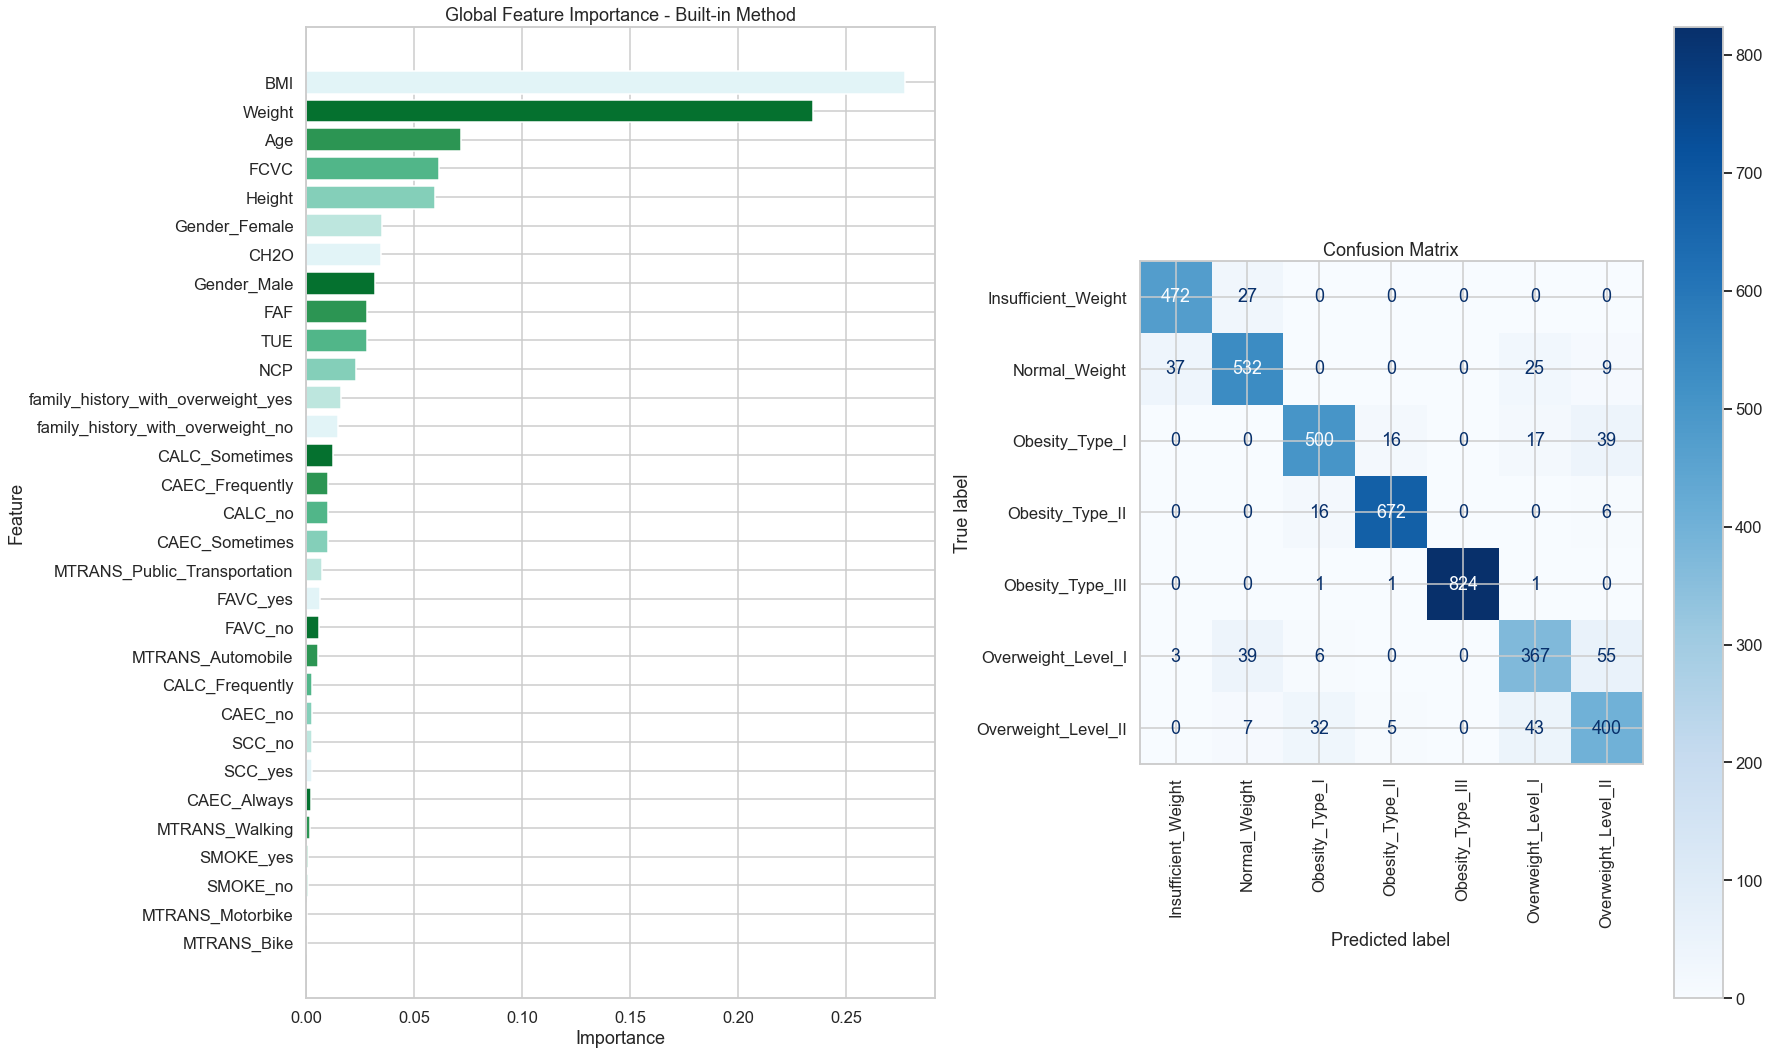

In [34]:
model_type = 'rf'
rf_model, rf_accuracy, rf_predictions = create_model('rf', X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 31
[LightGBM] [Info] Start training from score -2.104688
[LightGBM] [Info] Start training from score -1.901909
[LightGBM] [Info] Start training from score -1.960468
[LightGBM] [Info] Start training from score -1.872103
[LightGBM] [Info] Start training from score -1.640693
[LightGBM] [Info] Start training from score -2.138351
[LightGBM] [Info] Start training from score -2.099268
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94       499
      Normal_Weight       0.88      0.88      0.88       603
     Obesity_Type_I       0.91      0.89      0.90       572
    Obesity_Type_II     

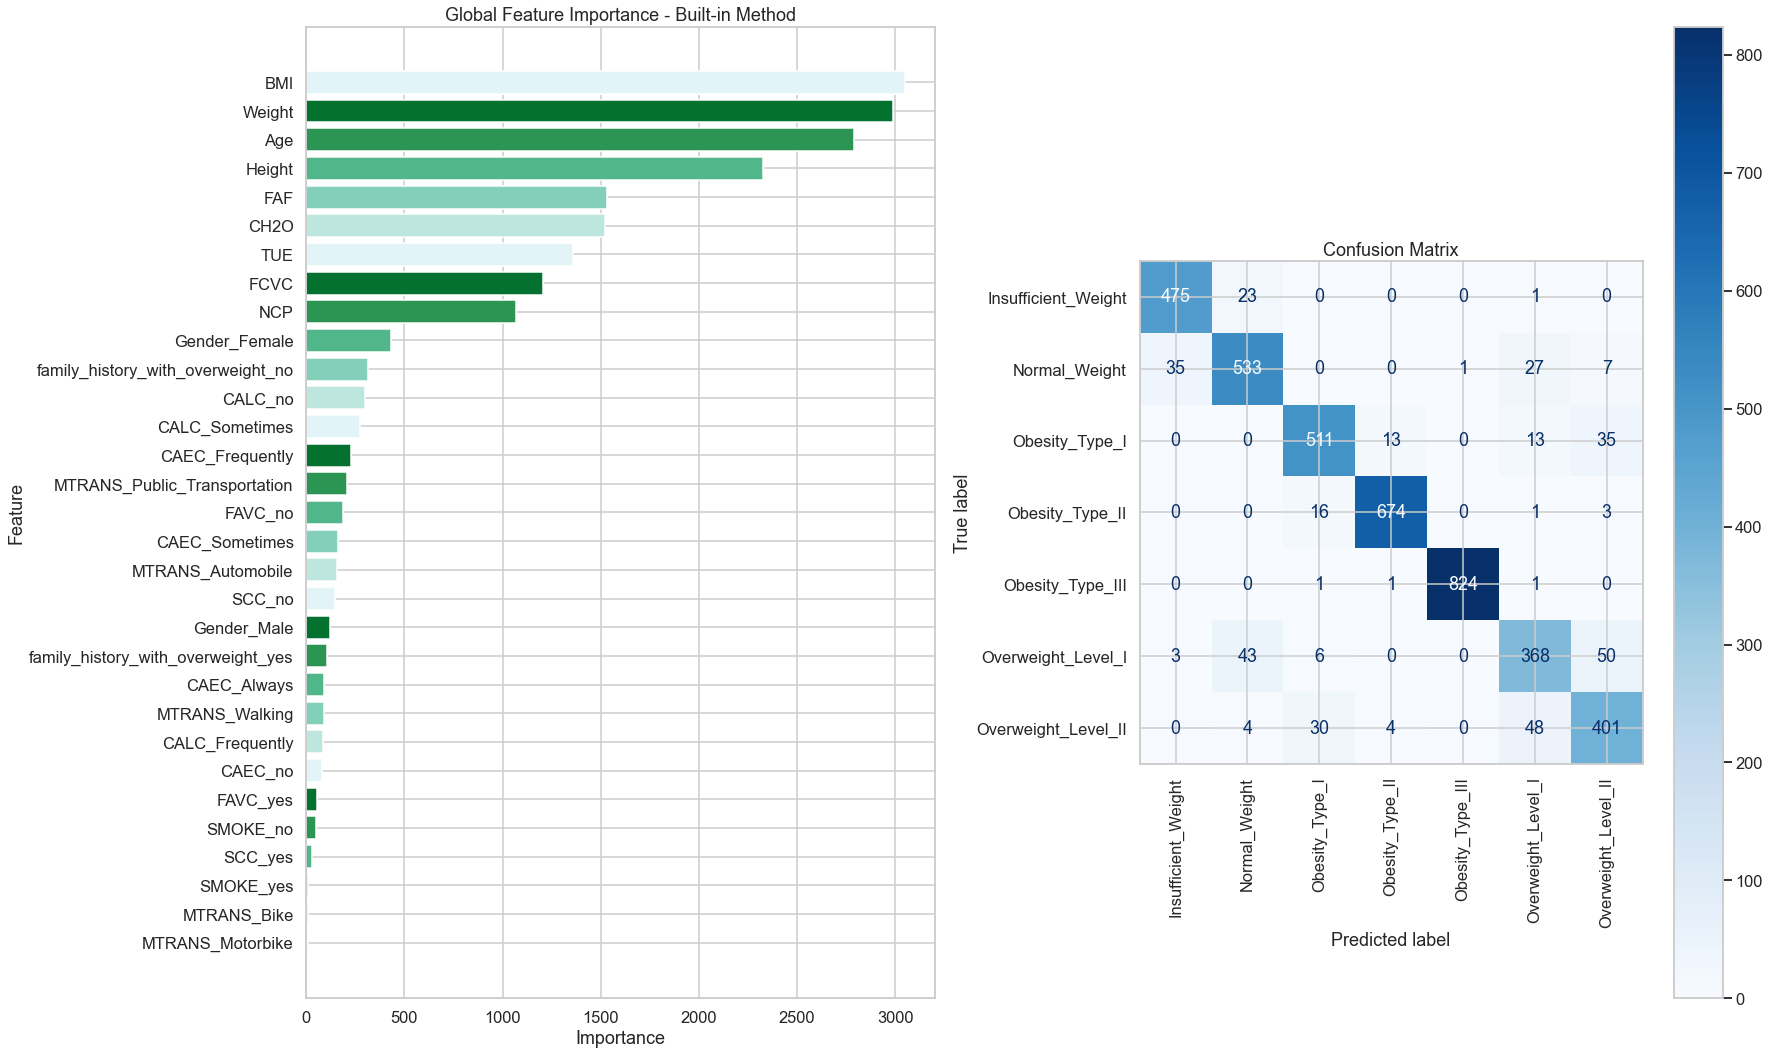

In [35]:
model_type = 'lgbm'
lgbm_model, lgbm_accuracy, lgbm_predictions = create_model('lgbm', X_train, X_test, y_train, y_test)

<a id="5"></a>
## <b>5. <span style='color:purple; border: 1px solid #000000;'>Prediction on Test Data</span></b> 

In [28]:
X_transformed_test = pd.DataFrame(pipeline.transform(test_data))
encoded_test_preds = rf_model.predict(X_transformed_test)
predictions_df = pd.DataFrame()
predictions_df['id'] = test_data['id']
predictions_df['NObeyesdad'] = label_encoding.inverse_transform(encoded_test_preds)
predictions_df.to_csv('predictions_test_data.csv',index = None)

In [29]:
X_transformed_test = pd.DataFrame(pipeline.transform(test_data))
encoded_test_preds = lgbm_model.predict(X_transformed_test)
predictions_df = pd.DataFrame()
predictions_df['id'] = test_data['id']
predictions_df['NObeyesdad'] = label_encoding.inverse_transform(encoded_test_preds)
predictions_df.to_csv('predictions_test_data_lgb.csv',index = None)